In [6]:
!pip install pandas scikit-learn openpyxl


In [7]:
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [8]:
def load_data_from_directory(directory):
    all_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.xlsx')]
    df_list = [pd.read_excel(file) for file in all_files]
    return pd.concat(df_list, ignore_index=True)

# Load data from directories
train_data = load_data_from_directory('E:\Brain_MRI_Projects_ULC\Brain_Tumor_Classification\Data_PCA\Train')
test_data = load_data_from_directory('E:\Brain_MRI_Projects_ULC\Brain_Tumor_Classification\Data_PCA\Test')
validation_data = load_data_from_directory('E:\Brain_MRI_Projects_ULC\Brain_Tumor_Classification\Data_PCA\Val')

# Display the first few rows of each DataFrame
train_data.head(), test_data.head(), validation_data.head()


(                                                 Dir         0         1  \
 0  Data/Train/fold_1/Grade_2/InternalDataset01(Ad...  0.281005  0.471176   
 1  Data/Train/fold_1/Grade_2/InternalDataset01(Ad...  2.030789  0.114731   
 2  Data/Train/fold_1/Grade_2/InternalDataset01(Ad...  0.295655  0.098890   
 3  Data/Train/fold_1/Grade_2/InternalDataset01(Ad...  0.412881  0.267679   
 4  Data/Train/fold_1/Grade_2/InternalDataset01(Ad...  1.819913  0.105317   
 
           2         3         4         5    6         7         8  ...  2038  \
 0  0.000000  0.085592  0.027635  0.019005  0.0  0.000000  0.000000  ...   0.0   
 1  0.000000  0.276703  0.040325  0.000000  0.0  0.034102  0.000000  ...   0.0   
 2  0.000000  0.005585  0.240090  0.016445  0.0  0.038199  0.000000  ...   0.0   
 3  0.033253  0.000000  0.061142  0.000000  0.0  0.264812  0.000000  ...   0.0   
 4  0.009900  0.168882  0.000000  0.000000  0.0  0.015927  0.078178  ...   0.0   
 
        2039      2040      2041      2042

In [9]:
# Assume 'Dir' is the first column
X_train = train_data.iloc[:, 1:]  # Exclude the first column (Dir)
dir_train = train_data.iloc[:, 0]  # First column is the image file name

X_test = test_data.iloc[:, 1:]
dir_test = test_data.iloc[:, 0]

X_validation = validation_data.iloc[:, 1:]
dir_validation = validation_data.iloc[:, 0]


In [10]:
scaler = StandardScaler()

# Fit on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test and validation data
X_test_scaled = scaler.transform(X_test)
X_validation_scaled = scaler.transform(X_validation)


In [11]:
# Decide on the number of principal components, e.g., retain 95% of the variance
pca = PCA(n_components=0.95)

# Fit PCA on the training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test and validation data
X_test_pca = pca.transform(X_test_scaled)
X_validation_pca = pca.transform(X_validation_scaled)


In [12]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

print("Explained variance ratio by each component:")
print(explained_variance_ratio)

print("Cumulative explained variance ratio:")
print(cumulative_explained_variance)


Explained variance ratio by each component:
[0.08405152 0.06146419 0.05682883 0.04029242 0.03270583 0.02936101
 0.02746781 0.0243091  0.02328453 0.0218313  0.01902105 0.01842069
 0.01702127 0.01659836 0.01548164 0.01410873 0.01356735 0.01199509
 0.0117029  0.01085336 0.01057751 0.01020795 0.00968775 0.00954985
 0.00902916 0.00842389 0.00823787 0.00783111 0.00755938 0.00741693
 0.00704819 0.00689359 0.00672531 0.00654003 0.00636488 0.00620383
 0.00608854 0.00596136 0.00557452 0.00548217 0.00545704 0.00519321
 0.00512413 0.00493403 0.00482308 0.00468143 0.00457537 0.00437224
 0.0043449  0.00425266 0.00415949 0.00403321 0.00397608 0.00389894
 0.00382988 0.00365198 0.00359733 0.00357193 0.00347007 0.00336319
 0.00334393 0.00330541 0.0032786  0.00318303 0.00315817 0.00311861
 0.00302083 0.0029993  0.00293205 0.00290175 0.002796   0.00274415
 0.00272575 0.002649   0.00264018 0.00259324 0.00252124 0.00247057
 0.00243962 0.00234088 0.00234002 0.00231563 0.00225056 0.00222059
 0.00217865 0.0021

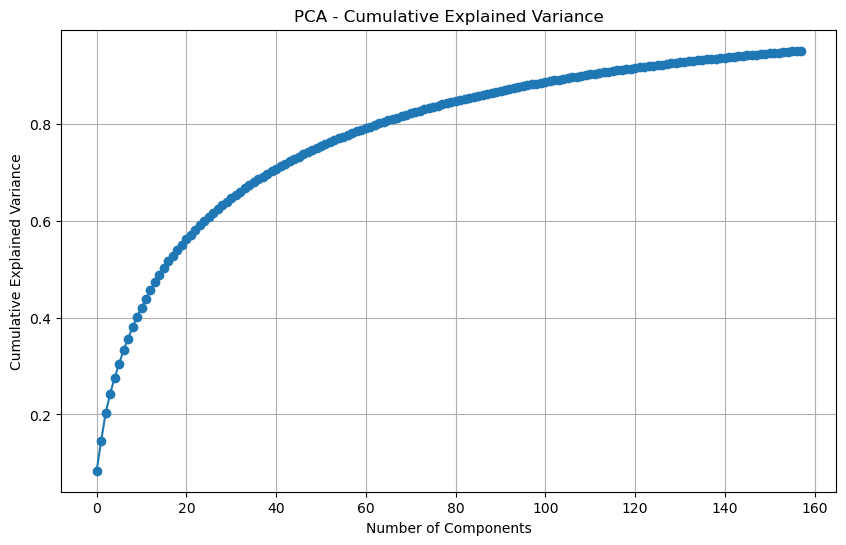

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid()
plt.show()


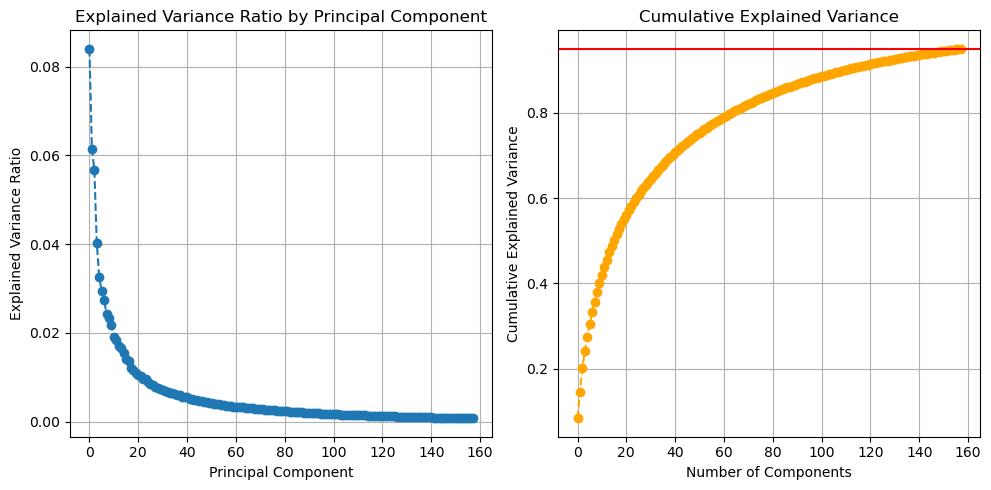

In [19]:
import matplotlib.pyplot as plt

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot explained variance ratio
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.grid()

# Plot cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(cumulative_explained_variance, marker='o', linestyle='--', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.grid()

plt.tight_layout()
plt.show()


In [7]:
print(X_train_pca.shape, X_test_pca.shape, X_validation_pca.shape)


(915, 158) (190, 158) (100, 158)


In [17]:
# Function to add 'Dir' column as the first column
def add_dir_column_as_first(df, dir_values):
    df['Dir'] = dir_values.values
    columns = ['Dir'] + [col for col in df.columns if col != 'Dir']
    return df[columns]

# Train Data
train_pca = pd.DataFrame(X_train_pca)
train_pca = add_dir_column_as_first(train_pca, dir_train)
train_pca.to_excel(r'E:/Brain_MRI_Projects_ULC/Brain_Tumor_Classification/Data_PCA/Resulted_data_PCA/train_data_pca.xlsx', index=False)

# Test Data
test_pca = pd.DataFrame(X_test_pca)
test_pca = add_dir_column_as_first(test_pca, dir_test)
test_pca.to_excel(r'E:/Brain_MRI_Projects_ULC/Brain_Tumor_Classification/Data_PCA/Resulted_data_PCA/test_data_pca.xlsx', index=False)

# Validation Data
validation_pca = pd.DataFrame(X_validation_pca)
validation_pca = add_dir_column_as_first(validation_pca, dir_validation)
validation_pca.to_excel(r'E:/Brain_MRI_Projects_ULC/Brain_Tumor_Classification/Data_PCA/Resulted_data_PCA/validation_data_pca.xlsx', index=False)
